In [1]:
## Preprocessing of freesurfer resutls
## Merging all PD/ET/NC freesurfer outputs into one table. /output/all_freesurfer_out.csv
#  reading subject list
from pathlib import Path
import pandas as pd
import seaborn as sns
out_dir = Path("/output")
sub_list_file = out_dir/'subjects.list'
sub_list = pd.read_csv(sub_list_file, sep='\t', header=0, index_col=0)

#reading freesurfer results

res_file = out_dir/'freesurfer_out_preped.csv'
FS_DIR   = out_dir/'freesurfer_output_20.2.0'
GROUPS   = ['PD','ET','NC']
n_groups = len(GROUPS);
group_data={};
for i_group in range(n_groups):
    print('Reading ' , GROUPS[i_group], ' freesurfer stats data...')
    sub_cortical_file = FS_DIR/GROUPS[i_group]/'aseg_stats.txt';
    wm_file = FS_DIR/GROUPS[i_group]/'wmparc_stats.txt'; 
    lh_area_file      = FS_DIR/GROUPS[i_group]/'lh.a2009s.area.txt';      rh_area_file      = FS_DIR/GROUPS[i_group]/'rh.a2009s.area.txt';
    lh_meancurv_file  = FS_DIR/GROUPS[i_group]/'lh.a2009s.meancurv.txt';  rh_meancurv_file  = FS_DIR/GROUPS[i_group]/'rh.a2009s.meancurv.txt';
    lh_thickness_file = FS_DIR/GROUPS[i_group]/'lh.a2009s.thickness.txt'; rh_thickness_file = FS_DIR/GROUPS[i_group]/'rh.a2009s.thickness.txt';
    lh_volume_file    = FS_DIR/GROUPS[i_group]/'lh.a2009s.volume.txt';    rh_volume_file    = FS_DIR/GROUPS[i_group]/'rh.a2009s.volume.txt';
    ## drop_list
    aseg_drop = ["EstimatedTotalIntraCranialVol"];
    wm_drop = ["MaskVol", "EstimatedTotalIntraCranialVol", "CerebralWhiteMatterVol", "rhCerebralWhiteMatterVol", "lhCerebralWhiteMatterVol"];
    area_drop1 = ["BrainSegVolNotVent"];                   area_drop2 = ["BrainSegVolNotVent", "eTIV"];
    meancurv_drop1  = ["BrainSegVolNotVent", "eTIV"];  meancurv_drop2 = ["BrainSegVolNotVent", "eTIV"];
    thickness_drop1 = ["BrainSegVolNotVent", "eTIV"]; thickness_drop2 = ["BrainSegVolNotVent", "eTIV"];
    volume_drop1    = ["BrainSegVolNotVent", "eTIV"];    volume_drop2 = ["BrainSegVolNotVent", "eTIV"];
    ##
    subcortical_tab  = pd.read_csv(sub_cortical_file, sep='\t', header=0, index_col=0); subcortical_tab.drop(aseg_drop, axis=1, inplace=True);
    res    = sub_list.join(subcortical_tab, how='left');
    wm_tab = pd.read_csv(wm_file, sep='\t', header=0, index_col=0); wm_tab.drop(wm_drop, axis=1, inplace=True);
    res1   = res.join(wm_tab, how='left');
    lh_area_tab = pd.read_csv(lh_area_file, sep='\t', header=0, index_col=0); lh_area_tab.drop(area_drop1, axis=1, inplace=True);
    rh_area_tab = pd.read_csv(rh_area_file, sep='\t', header=0, index_col=0); rh_area_tab.drop(area_drop2, axis=1, inplace=True);
    res2 = res1.join(lh_area_tab, how='left'); res3 = res2.join(rh_area_tab, how='left');
    lh_meancurv_tab = pd.read_csv(lh_meancurv_file, sep='\t', header=0, index_col=0); lh_meancurv_tab.drop(meancurv_drop1, axis=1, inplace=True);
    rh_meancurv_tab = pd.read_csv(rh_meancurv_file, sep='\t', header=0, index_col=0); rh_meancurv_tab.drop(meancurv_drop2, axis=1, inplace=True);
    res4 = res3.join(lh_meancurv_tab, how='left'); res5 = res4.join(rh_meancurv_tab, how='left');
    lh_thickness_tab = pd.read_csv(lh_thickness_file, sep='\t', header=0, index_col=0); lh_thickness_tab.drop(thickness_drop1, axis=1, inplace=True);
    rh_thickness_tab = pd.read_csv(rh_thickness_file, sep='\t', header=0, index_col=0); rh_thickness_tab.drop(thickness_drop2, axis=1, inplace=True);
    res6 = res5.join(lh_thickness_tab, how='left'); res7 = res6.join(rh_thickness_tab, how='left');
    lh_volume_tab = pd.read_csv(lh_volume_file, sep='\t', header=0, index_col=0); lh_volume_tab.drop(volume_drop1, axis=1, inplace=True);
    rh_volume_tab = pd.read_csv(rh_volume_file, sep='\t', header=0, index_col=0); rh_volume_tab.drop(volume_drop2, axis=1, inplace=True);
    res8 = res7.join(lh_volume_tab, how='left'); res9 = res8.join(rh_volume_tab, how='left');
    group_data[GROUPS[i_group]]=res9[res9['diagnosis']==GROUPS[i_group]]
all_data = pd.concat([group_data['PD'], group_data['ET'], group_data['NC']])
for x in GROUPS:
    print(x , len(all_data[all_data["diagnosis"]==x]))


Bad key "text.kerning_factor" on line 4 in
/usr/local/miniconda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


Reading  PD  freesurfer stats data...
Reading  ET  freesurfer stats data...
Reading  NC  freesurfer stats data...
PD 42
ET 38
NC 34


In [2]:
suit_label_file  = out_dir/'atlasPackage'/'atlasesSUIT'/'Lobules-SUIT.nii.lut'
#suit_res_file = out_dir/'res_SUIT'/'res'/'cerebellum_suit.txt'
#MDTB_res_file = out_dir/'res_SUIT'/'res'/'cerebellum_MDTB10.txt'
suit_res_file = out_dir/'res_SUIT'/'res'/'res_SUIT34.csv'
MDTB_res_file = out_dir/'res_SUIT'/'res'/'res_MDTB10.csv'

suit_res_df = pd.read_csv(suit_res_file, sep=',', header=None, index_col=None)
suit_label_df = pd.read_csv(suit_label_file, sep=' ', header=None, index_col=None); 
MDTB_res_df = pd.read_csv(MDTB_res_file, sep=',', header=None, index_col=None)

suit_res_df.columns=suit_label_df.iloc[:,7];suit_res_df.index=all_data.index;
suit_res_df
MDTB_res_df.columns=['MDTB_'+str(x+1) for x in range(10)]; MDTB_res_df.index=all_data.index;
MDTB_res_df
all_data = all_data.join(suit_res_df, how='left');  all_data = all_data.join(MDTB_res_df, how='left')

In [3]:
print(suit_res_df.columns); print(MDTB_res_df.columns);

Index(['Left_I_IV', 'Right_I_IV', 'Left_V', 'Right_V', 'Left_VI', 'Vermis_VI',
       'Right_VI', 'Left_CrusI', 'Vermis_CrusI', 'Right_CrusI', 'Left_CrusII',
       'Vermis_CrusII', 'Right_CrusII', 'Left_VIIb', 'Vermis_VIIb',
       'Right_VIIb', 'Left_VIIIa', 'Vermis_VIIIa', 'Right_VIIIa', 'Left_VIIIb',
       'Vermis_VIIIb', 'Right_VIIIb', 'Left_IX', 'Vermis_IX', 'Right_IX',
       'Left_X', 'Vermis_X', 'Right_X', 'Left_Dentate', 'Right_Dentate',
       'Left_Interposed', 'Right_Interposed', 'Left_Fastigial',
       'Right_Fastigial'],
      dtype='object', name=7)
Index(['MDTB_1', 'MDTB_2', 'MDTB_3', 'MDTB_4', 'MDTB_5', 'MDTB_6', 'MDTB_7',
       'MDTB_8', 'MDTB_9', 'MDTB_10'],
      dtype='object')


In [4]:
all_data.index   = [x.replace('-','_') for x in all_data.index]
all_data.columns = [x.replace('-','_') for x in all_data.columns]
# remove problematic subjects
all_data=all_data.drop(index='sub_0073'); # only left brain NC
all_data.columns

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'MDTB_1', 'MDTB_2', 'MDTB_3', 'MDTB_4', 'MDTB_5', 'MDTB_6', 'MDTB_7',
       'MDTB_8', 'MDTB_9', 'MDTB_10'],
      dtype='object', length=779)

In [5]:
# QA checking: nan errors (eTIV)
import numpy as np
#[print(x, all_data.loc[x,'eTIV']) for x in all_data.index if np.isnan(all_data.loc[x,'eTIV'])]
all_data[all_data.isna().any(axis=1)]

,age,sex,diagnosis,Left_Lateral_Ventricle,Left_Inf_Lat_Vent,Left_Cerebellum_White_Matter,Left_Cerebellum_Cortex,Left_Thalamus_Proper,Left_Caudate,Left_Putamen,...,MDTB_1,MDTB_2,MDTB_3,MDTB_4,MDTB_5,MDTB_6,MDTB_7,MDTB_8,MDTB_9,MDTB_10


In [6]:
# generate the indicator variables for diagnosis and sex
import pandas as pd
import seaborn as sns
#reading freesurfer results
def eqStr(x, str_y):
    if x == str_y:
        return 1
    else:
        return 0
tab_data = all_data.copy();
tab_data["is_PD"]     = [eqStr(x, "PD") for x in tab_data["diagnosis"]];
tab_data["is_ET"]     = [eqStr(x, "ET") for x in tab_data["diagnosis"]];
tab_data["is_NC"]     = [eqStr(x, "NC") for x in tab_data["diagnosis"]];
tab_data["is_Male"]   = [eqStr(x, "M") for x in tab_data["sex"]];
tab_data["is_Female"] = [eqStr(x, "F") for x in tab_data["sex"]];
tab_data=tab_data.rename(index=dict(zip(tab_data.index, [x.replace('-','_') for x in tab_data.index])),
                         columns=dict(zip(tab_data.columns, [x.replace('-','_') for x in tab_data.columns])),)
print(tab_data.columns)

Index(['age', 'sex', 'diagnosis', 'Left_Lateral_Ventricle',
       'Left_Inf_Lat_Vent', 'Left_Cerebellum_White_Matter',
       'Left_Cerebellum_Cortex', 'Left_Thalamus_Proper', 'Left_Caudate',
       'Left_Putamen',
       ...
       'MDTB_6', 'MDTB_7', 'MDTB_8', 'MDTB_9', 'MDTB_10', 'is_PD', 'is_ET',
       'is_NC', 'is_Male', 'is_Female'],
      dtype='object', length=784)


PD 42
ET 38
NC 33


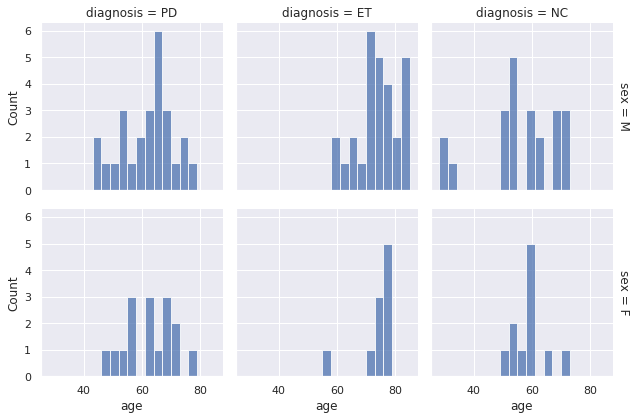

In [7]:
# plot sex and diagnosis distribution 2*3
for x in GROUPS:
    print(x , len(tab_data[tab_data["diagnosis"]==x]))
sns.set_theme(style="darkgrid")
sns.displot(
    tab_data, x="age", col="diagnosis", row="sex", 
    binwidth=3, height=3, facet_kws=dict(margin_titles=True))

In [8]:
tab_data.to_csv(res_file)

In [9]:
suit_res_df

7,Left_I_IV,Right_I_IV,Left_V,Right_V,Left_VI,Vermis_VI,Right_VI,Left_CrusI,Vermis_CrusI,Right_CrusI,...,Right_IX,Left_X,Vermis_X,Right_X,Left_Dentate,Right_Dentate,Left_Interposed,Right_Interposed,Left_Fastigial,Right_Fastigial
id,,,,,,,,,,,,,,,,,,,,,
sub-0002,3657,4166,4686,4560,10630,2352,9603,15879,22,14914,...,3647,816,377,826,1510,1674,216,224,33,43
sub-0004,145,169,164,160,339,123,294,685,1,557,...,183,45,55,37,7,8,0,1,0,0
sub-0005,4103,4742,5519,5298,12876,2556,10860,18316,27,18923,...,4606,854,437,826,1597,1755,229,235,41,42
sub-0006,4282,4882,5430,5264,11951,2408,10358,15404,17,15478,...,3870,830,623,763,1220,1357,177,185,44,34
sub-0008,3232,3783,4505,4351,10322,2009,8699,14561,23,13545,...,3299,721,374,752,1463,1534,199,224,40,39
sub-0009,2828,3291,3860,3789,8994,1802,7544,11928,12,11625,...,3341,598,350,521,1554,1676,216,226,42,39
sub-0012,3318,3861,4483,4374,9778,1940,8649,14004,22,14055,...,3769,742,446,793,1245,1470,185,198,41,44
sub-0014,3541,4044,4726,4714,10491,2115,9302,15563,18,15638,...,3626,824,382,764,1568,1661,232,248,49,36
sub-0015,3124,3642,4322,4219,8760,1754,7632,12513,13,12279,...,3206,803,407,707,1347,1372,211,190,34,40
